# Video Game Market Analysis: Uncovering Sales Trends and Market Dynamics

---

Welcome to this data analysis project! Here, we'll dive into a comprehensive dataset of video game sales to extract key insights into industry trends, dominant publishers, platform performance, and regional sales patterns.

Our goal is to simulate a real-world scenario where we act as data analysts for a **new game development studio**. We'll answer specific client questions to help them understand the competitive landscape and make informed strategic decisions.

---

### Setting Up Our Environment
First, we'll import all the necessary Python libraries for our analysis. These tools will help us manipulate data, perform calculations, and create compelling visualizations.

In [34]:
import kagglehub
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# set matplotlib inline
%matplotlib inline

# Set display options for pandas
pd.set_option('display.max_rows', None)

# Download dataset
path = kagglehub.dataset_download("gregorut/videogamesales")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\dylan\.cache\kagglehub\datasets\gregorut\videogamesales\versions\2


### Loading the Dataset
With our environment ready, the next step is to load the video game sales dataset into a Pandas DataFrame. This DataFrame will serve as the foundation of our analysis, containing all the raw data we'll be exploring.

In [35]:
# Save the cleaned DataFrame to a new CSV file
df = pd.read_csv('vgsales.csv')

# Display the first few rows of the DataFrame
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


### Initial Data Inspection: Understanding Our Data's Structure
With the dataset loaded, our next critical step is to perform an initial inspection to understand its structure, data types, and identify any potential missing values. The df.info() method provides a concise summary, including the number of entries, columns, non-null values, and memory usage. This helps us quickly spot inconsistencies or issues that may require cleaning before further analysis.

In [36]:
# check data types and missing/na values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


### Data Cleaning & Type Conversion: ##### 
#### Refining the 'Year' Column
Upon initial inspection, we noted that the 'Year' column might not be in the most appropriate data type for time-series analysis or proper chronological sorting. To ensure our temporal analyses are accurate and efficient, we will convert the 'Year' column to a datetime format.

After this conversion, we'll re-check the df.info() to confirm the change has been applied successfully and to see if any new insights into our data's structure emerge.

In [37]:
# Convert 'Year' column to datetime format
df['Year'] = pd.to_datetime(df['Year'], format='%Y')
# Check Year conversion
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Rank          16598 non-null  int64         
 1   Name          16598 non-null  object        
 2   Platform      16598 non-null  object        
 3   Year          16327 non-null  datetime64[ns]
 4   Genre         16598 non-null  object        
 5   Publisher     16540 non-null  object        
 6   NA_Sales      16598 non-null  float64       
 7   EU_Sales      16598 non-null  float64       
 8   JP_Sales      16598 non-null  float64       
 9   Other_Sales   16598 non-null  float64       
 10  Global_Sales  16598 non-null  float64       
dtypes: datetime64[ns](1), float64(5), int64(1), object(4)
memory usage: 1.4+ MB


#### Addressing Missing Values: Assessing Their Impact
After reviewing the dataset's information, we've identified missing values (NaN/NaT) in both the 'Year' and 'Publisher' columns. The way we handle these missing entries can significantly impact our analytical results, especially when identifying top games, publishers, or sales trends over time.

Before deciding on a strategy (such as dropping these rows or imputing values), it's critical to assess the potential impact of these missing data points. We need to answer:

Do these games with missing 'Year' or 'Publisher' data represent a significant portion of overall sales?
Are any of these games top-selling titles or major contributors to sales on specific platforms?
Understanding the sales volume associated with these incomplete records will allow us to make an informed decision about whether dropping them is a viable option without losing valuable insights into market leaders and performance.

In [38]:
# Check impact of dropping rows with NaN values in 'Year' and 'Publisher'
missingData = df[(df['Year'].isna() | df['Publisher'].isna())].sort_values(by='Global_Sales', ascending=False)
print(missingData.shape[0], "rows with missing 'Year' or 'Publisher' values.")
missingData.head()

307 rows with missing 'Year' or 'Publisher' values.


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
179,180,Madden NFL 2004,PS2,NaT,Sports,Electronic Arts,4.26,0.26,0.01,0.71,5.23
377,378,FIFA Soccer 2004,PS2,NaT,Sports,Electronic Arts,0.59,2.36,0.04,0.51,3.49
431,432,LEGO Batman: The Videogame,Wii,NaT,Action,Warner Bros. Interactive Entertainment,1.86,1.02,0.00,0.29,3.17
470,471,wwe Smackdown vs. Raw 2006,PS2,NaT,Fighting,NaN,1.57,1.02,0.00,0.41,3.00
607,608,Space Invaders,2600,NaT,Shooter,Atari,2.36,0.14,0.00,0.03,2.53


#### Decision on Missing Values: Dropping Incomplete Records
Our investigation into the missing values in the 'Year' and 'Publisher' columns revealed that the games associated with these incomplete records do not significantly contribute to the overall global sales. The highest sales figure for a game with missing data in these columns was approximately 5 million, and these instances collectively represent a very small fraction (307 out of over 16k rows) of our entire dataset.

Given this minimal impact on our key sales metrics and the relatively small number of affected rows, we've decided to drop these rows with missing 'Year' or 'Publisher' values. This approach ensures the integrity and completeness of data for our analyses dependent on these crucial columns (such as time-series trends and publisher-specific insights) without losing substantial overall sales information.

In [39]:
# Drop rows with NaN values in 'Year' and 'Publisher']
df= df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16291 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Rank          16291 non-null  int64         
 1   Name          16291 non-null  object        
 2   Platform      16291 non-null  object        
 3   Year          16291 non-null  datetime64[ns]
 4   Genre         16291 non-null  object        
 5   Publisher     16291 non-null  object        
 6   NA_Sales      16291 non-null  float64       
 7   EU_Sales      16291 non-null  float64       
 8   JP_Sales      16291 non-null  float64       
 9   Other_Sales   16291 non-null  float64       
 10  Global_Sales  16291 non-null  float64       
dtypes: datetime64[ns](1), float64(5), int64(1), object(4)
memory usage: 1.5+ MB


### Exploring Data Distribution: Platforms and Genres
Now that our data is clean, let's start understanding its composition. We'll visualize the distribution of video games across different platforms and genres. This will give us a clear picture of which platforms host the most games and which genres are most frequently represented in our dataset. This initial exploration is crucial for identifying popular categories before diving into sales figures.

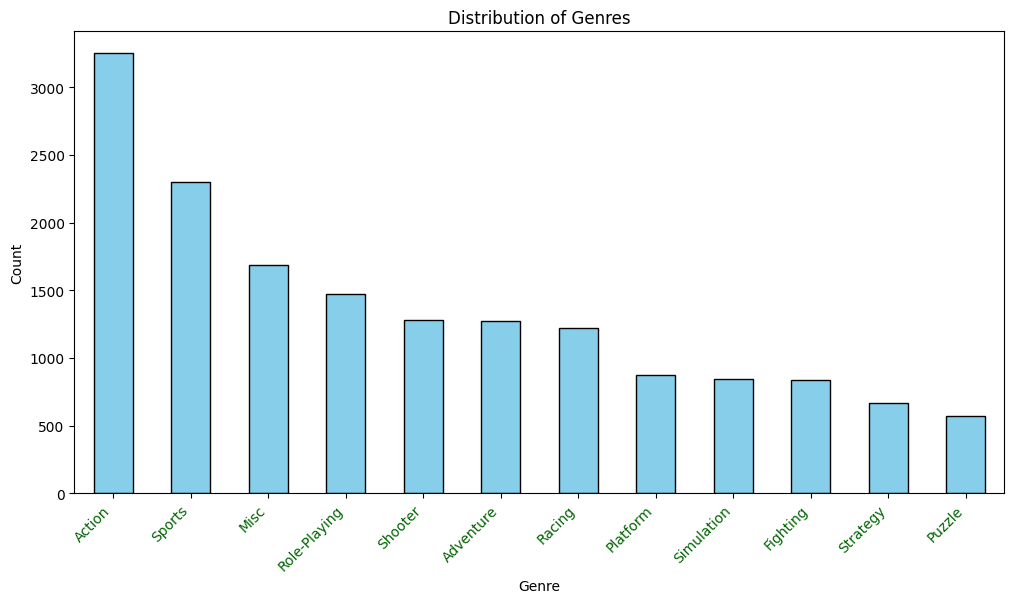

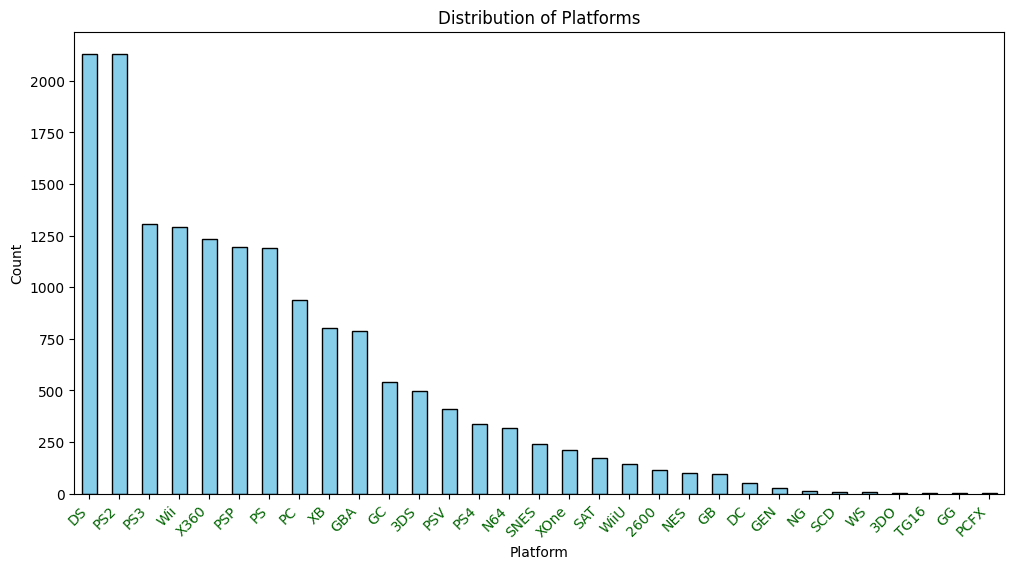

In [40]:
# Plotting the distribution of platforms and genres
plt.figure(figsize=(12, 6))
df['Genre'].value_counts().plot(kind='bar', figsize=(12, 6), color='skyblue', edgecolor='black')
plt.title('Distribution of Genres')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right', color='darkgreen')
plt.figure(figsize=(12, 6))
df['Platform'].value_counts().plot(kind='bar', figsize=(12, 6), color='skyblue', edgecolor='black')
plt.title('Distribution of Platforms')
plt.xlabel('Platform')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right', color='darkgreen')
# Show the plots
plt.show()

### Uncovering Yearly Blockbusters: Top-Selling Games by Year
To gain a deeper understanding of market dynamics, our client, the game development studio, is particularly interested in historical game sales. This analysis aims to:

Identify the biggest hits: Pinpoint which specific titles dominated global sales in particular years.
Observe evolving trends: See how the landscape of top-selling titles changes from one year to the next, potentially reflecting shifts in popular genres, platforms, or even successful marketing strategies.
We will create a structured view of these yearly leaders and then visualize their sales using bar charts, providing a clear and direct comparison of their success within their respective release periods.

In [41]:
# Top selling games by Year
#top_selling_games_ties = df.groupby(df['Year'].dt.year).apply(lambda x: x.nlargest(1, 'Global_Sales')).reset_index(drop=True)
topSellingGames = df.loc[df.groupby(df['Year'].dt.year)['Global_Sales'].idxmax()]
topSellingGames.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
258,259,Asteroids,2600,1980-01-01,Shooter,Atari,4.00,0.26,0.00,0.05,4.31
239,240,Pitfall!,2600,1981-01-01,Platform,Activision,4.21,0.24,0.00,0.05,4.50
89,90,Pac-Man,2600,1982-01-01,Puzzle,Atari,7.28,0.45,0.00,0.08,7.81
421,422,Baseball,NES,1983-01-01,Sports,Nintendo,0.73,0.10,2.35,0.02,3.20
9,10,Duck Hunt,NES,1984-01-01,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


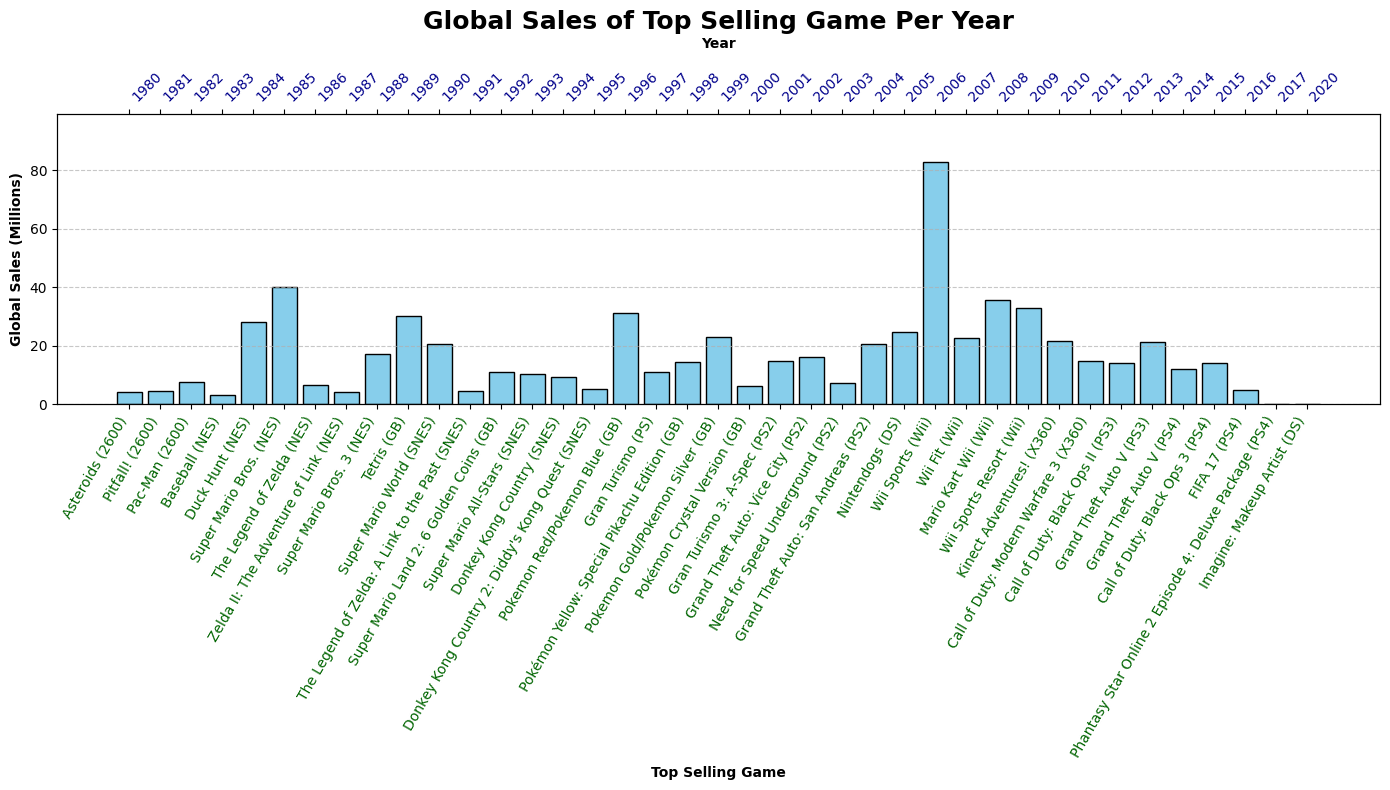

In [42]:
# Create the Bar Chart with Dual X-Axes
fig, ax1 = plt.subplots(figsize=(14, 8)) # Adjust figure size for better readability

# Create numerical positions for the x-axis ticks
# These will correspond to each game/year in the sorted DataFrame
x_positions = np.arange(len(topSellingGames))

# Plot the bars on the primary (bottom) axis
ax1.bar(x_positions, topSellingGames['Global_Sales'], color='skyblue', edgecolor='black')

# Set labels and ticks for the BOTTOM x-axis (Game Names)
bottom_axis_labels = topSellingGames.apply(
    lambda row: f"{row['Name']} ({row['Platform']})", axis=1
)
ax1.set_xticks(x_positions)
ax1.set_xticklabels(bottom_axis_labels, rotation=60, ha='right', fontsize=10, color='darkgreen')
#ax1.set_xticklabels(top_selling_games['Name'], rotation=60, ha='right', fontsize=10, color='darkgreen')
ax1.set_xlabel('Top Selling Game', fontsize=10, fontweight='bold')
ax1.set_ylabel('Global Sales (Millions)', fontsize=10, fontweight='bold')

# Create a secondary x-axis on the TOP
ax2 = ax1.twiny() # Creates a new Axes that shares the y-axis but has an independent x-axis

# Set labels and ticks for the TOP x-axis (Years)
ax2.set_xticks(x_positions) # Use the same numerical positions as the bottom axis
ax2.set_xticklabels(topSellingGames['Year'].dt.year, rotation=45, ha='left', fontsize=10, color='darkblue')
ax2.set_xlabel('Year', fontsize=10, fontweight='bold', labelpad=15) # labelpad adds space between label and axis

# Ensure the x-limits are the same for both axes so they align correctly
ax2.set_xlim(ax1.get_xlim())

# --- 3. Add General Chart Enhancements ---
plt.title('Global Sales of Top Selling Game Per Year', fontsize=18, fontweight='bold')

# Add a horizontal grid for readability
ax1.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust y-axis limit to give some space above the highest bar
ax1.set_ylim(0, topSellingGames['Global_Sales'].max() * 1.2)

# Adjust layout to prevent labels from being cut off
plt.tight_layout()
plt.show()

### Platform Performance: Total Sales by Platform
Our client, the game development studio, has observed a **variety of platforms emerging and evolving throughout the years**. Now, they're particularly keen to understand which platforms have been the **most commercially successful in terms of total global sales**. This analysis is crucial for identifying historical revenue drivers and informing strategic decisions regarding future game development and platform targeting.

We will visualize the sum of global sales for each platform using a bar chart, clearly showcasing the market leaders in terms of revenue generated.

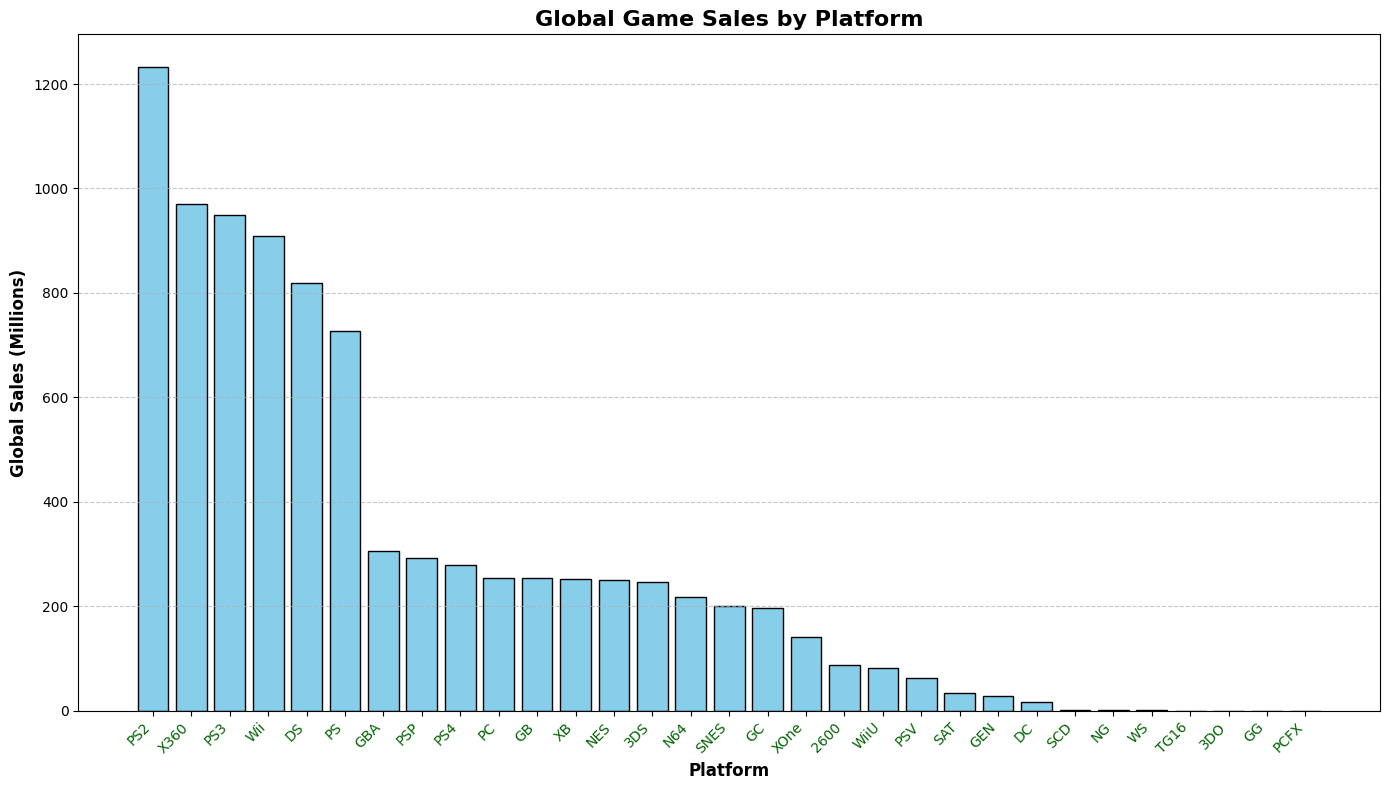

In [43]:
# Platforms by Global Sales
platformSales = df.groupby('Platform')[['Global_Sales']].sum().sort_values('Global_Sales', ascending=False).reset_index()
fig, ax = plt.subplots(figsize=(14, 8))  # Adjust figure size for better readability
# Plot the bars
ax.bar(platformSales['Platform'], platformSales['Global_Sales'], color='skyblue', edgecolor='black')
# Set labels and title
ax.set_xlabel('Platform', fontsize=12, fontweight='bold')
ax.set_ylabel('Global Sales (Millions)', fontsize=12, fontweight='bold')
ax.set_title('Global Game Sales by Platform', fontsize=16, fontweight='bold')
# Rotate x-tick labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=10, color='darkgreen')
# Add a horizontal grid for readability
ax.grid(axis='y', linestyle='--', alpha=0.7)
# Adjust layout to prevent labels from being cut off
plt.tight_layout()
plt.show()

### Sales Distribution by Platform: A Deeper Dive
While total sales figures offer a broad overview of platform success, our client is now curious about the distribution of sales for games released on each platform. They want to understand the typical sales performance and consistancy for games on different systems.

To achieve this, we will use box plots. A box plot is an excellent visualization tool for summarizing the distribution of a numerical variable (like sales) across different categories (like platforms). For each platform, the box plot will clearly show:

The median sales (the middle value).
The interquartile range (IQR), represented by the box (the middle 50% of data, from the 25th to the 75th percentile).
The range of typical sales (often depicted by "whiskers" extending from the box).
This will provide our client with a nuanced understanding of platform performance beyond just aggregate numbers, highlighting consistency or variability in sales across different gaming systems.

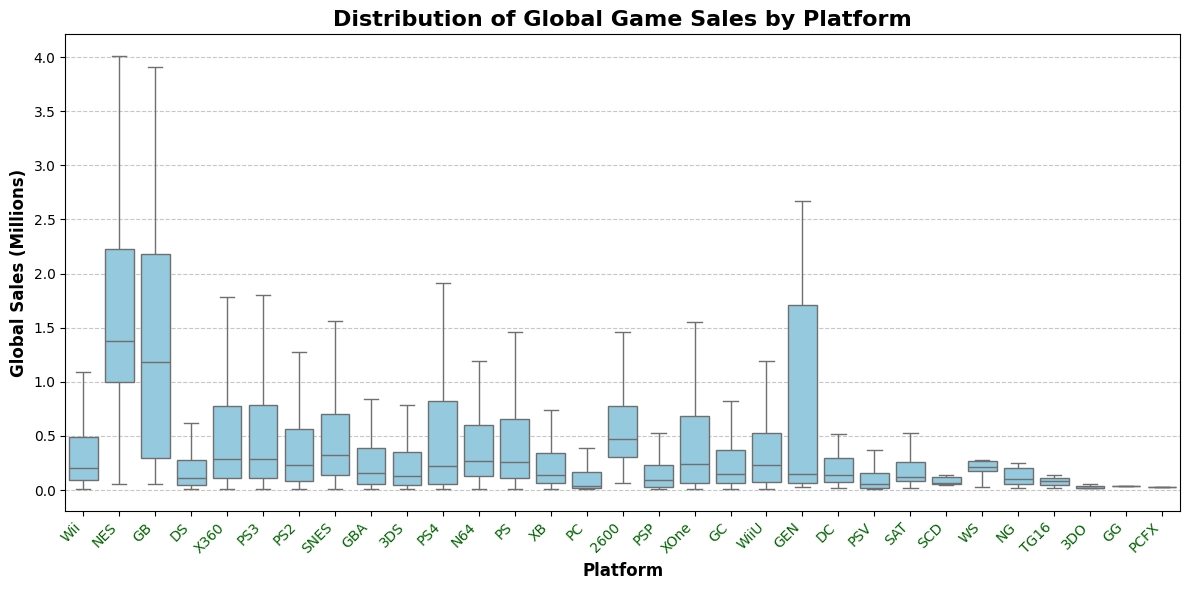

In [44]:
# Create a box plot to show the distribution of Global Sales by Platform
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Platform', y='Global_Sales', showfliers=False, color='skyblue')
plt.title('Distribution of Global Game Sales by Platform', fontsize=16, fontweight='bold')
plt.xlabel('Platform', fontsize=12, fontweight='bold')
plt.ylabel('Global Sales (Millions)', fontsize=12, fontweight='bold')
plt.xticks(rotation=45, ha='right', fontsize=10, color='darkgreen')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Genre Trends Over Time: Informing Game Development Focus
Now that our client, the game development studio, has a clearer understanding of potential platform targets, their next crucial decision involves which genre their new game should fall into. To best advise them on this, we need to analyze how different game genres have performed in terms of sales throughout the years.

This time-series analysis will reveal:

Emerging Trends: Which genres are on the rise or in decline, indicating shifts in player preference.
Evergreen Genres: Which genres consistently generate high and stable sales over long periods.
Market Volatility: Genres that experience significant fluctuations in popularity or revenue.
By visualizing the total sales for each genre across the years, we can provide strategic guidance on genre selection, helping the client focus their development efforts on areas with proven and sustained market potential.

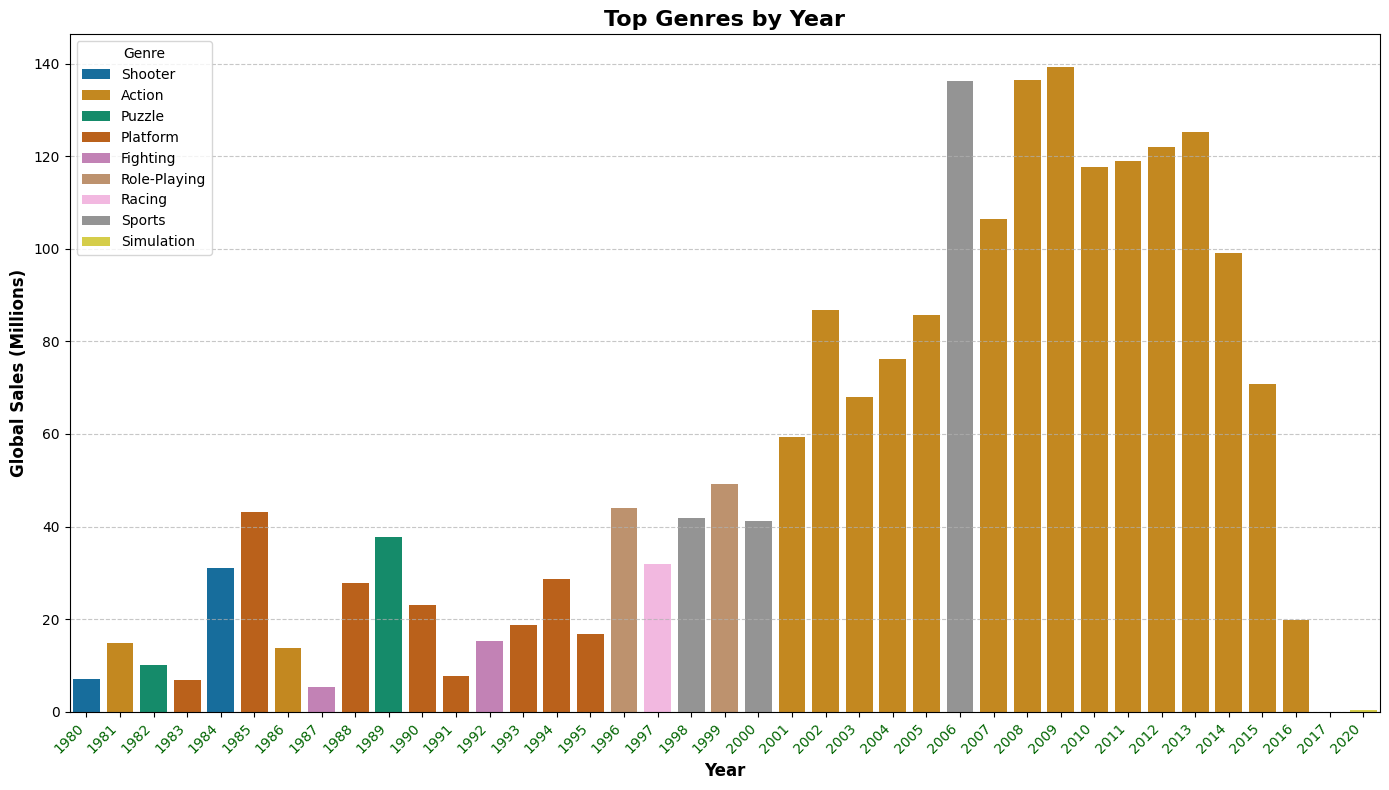

In [45]:
# Find the top genre for each year
genreYearlySales = df.groupby(['Year', 'Genre'])['Global_Sales'].sum().reset_index()
topGenres = genreYearlySales.loc[genreYearlySales.groupby('Year')['Global_Sales'].idxmax()]
# Create a Bar Chart for Top Genres by Year
fig, ax = plt.subplots(figsize=(14, 8))  # Adjust figure size for better readability
sns.barplot(data=topGenres, x=topGenres['Year'].dt.year, y='Global_Sales', hue='Genre', ax=ax, palette='colorblind')
# Set labels and title
ax.set_xlabel('Year', fontsize=12, fontweight='bold')
ax.set_ylabel('Global Sales (Millions)', fontsize=12, fontweight='bold')
ax.set_title('Top Genres by Year', fontsize=16, fontweight='bold')
# Rotate x-tick labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=10, color='darkgreen')
# Add a horizontal grid for readability
ax.grid(axis='y', linestyle='--', alpha=0.7)
# Adjust layout to prevent labels from being cut off
plt.tight_layout()
plt.show()

In [46]:
# Calculate the total global sales for each year
#genreYearlySales = df.groupby(['Year', 'Genre'])['Global_Sales'].sum().reset_index()
pivotSales = genreYearlySales.pivot_table(
    index='Year',      # Rows will be Years
    columns='Genre',   # Columns will be Genres
    values='Global_Sales' # Values will be Global_Sales
)

# Fill the NaNs in the pivot table with 0
pivotSalesFilled = pivotSales.fillna(0)

# Stack the DataFrame back to long format (Year, Genre, Global_Sales)
# This converts the pivoted table back into the format needed for Plotly,
# now explicitly including all (Year, Genre) combinations with 0 sales where applicable.
genreYearlySalesComplete = pivotSalesFilled.stack().reset_index(name='Global_Sales')

# Calculate the total global sales for each year
totalYearlySales = genreYearlySalesComplete.groupby('Year')['Global_Sales'].sum().reset_index()
totalYearlySales.rename(columns={'Global_Sales': 'Yearly_Total_Sales'}, inplace=True)

# Merge the total yearly sales back to calculate market share for each genre
genreMarketShare = pd.merge(genreYearlySalesComplete, totalYearlySales, on='Year')

# Calculate Market_Share. Handle potential division by zero.
genreMarketShare['Market_Share'] = (
    genreMarketShare['Global_Sales'] / genreMarketShare['Yearly_Total_Sales'].replace(0, pd.NA)
) * 100

# Fill any remaining NaN Market_Share (from original NaNs or division by zero) with 0.
genreMarketShare['Market_Share'] = genreMarketShare['Market_Share'].fillna(0)

# Create the Stacked Area Chart using Plotly Express
fig = px.area(genreMarketShare,
              x='Year',
              y='Market_Share',
              color='Genre',
              title='Genre Market Share Over Time',
              labels={'Market_Share': 'Market Share (%)', 'Year': 'Year'},
              hover_data={
                  'Global_Sales': True,  # Show raw total sales for that genre/year
                  'Market_Share': True,  # Show formatted market share percentage
                  'Genre': True  # Show genre in hover
              }
             )

fig.update_traces(
    hovertemplate="<br>".join([
        "Genre: %{customdata[1]}",
        "Global Sales (this genre): %{customdata[0]:,.1f}M", # Global_Sales remains customdata[0]
        "Market Share: %{y:.2f}%",    # Use %{y} directly with formatting ***
        "<extra></extra>"
    ])
)

# Update layout for better interactivity and presentation
fig.update_layout(
    hovermode="x unified", # This makes hovering over a year show values for all genres in that year
    yaxis_range=[0, 100], # Ensure Y-axis is from 0 to 100 for market share percentages
    xaxis_title='Year',
    yaxis_title='Market Share (%)',
    font=dict(size=12),
    title_font_size=18,
    legend_title_text='Game Genre',
    height=700,
    width=1400,
    hoverlabel=dict(
        bgcolor="white",
        font_size=9,
        font_family="Arial"
    ),
    title_x=0.5,  # Center the title
)
fig.update_yaxes(rangemode="tozero") # Ensures y-axis starts at zero for proportions (even though range is set)

fig.show()

### Granular Market Insights: Top Genres by Platform
Having explored the overall dominance of various platforms and the evolving trends of game genres over the years, our client, the game development studio, now needs a more detailed understanding of market success. Their critical next question is: "Which genres perform best on specific platforms?"

This analysis combines our previous insights, revealing the winning genre-platform combinations. Knowing the top-selling genres for each platform provides highly actionable intelligence, helping the client to:

* **Refine their game concept:** Align development with proven genre appeal on their chosen console.
* **Optimize resource allocation:** Focus marketing and design efforts where they're most likely to yield returns.

The following bar chart clearly illustrates the top genres on each platform, showcasing where particular game types truly thrive.

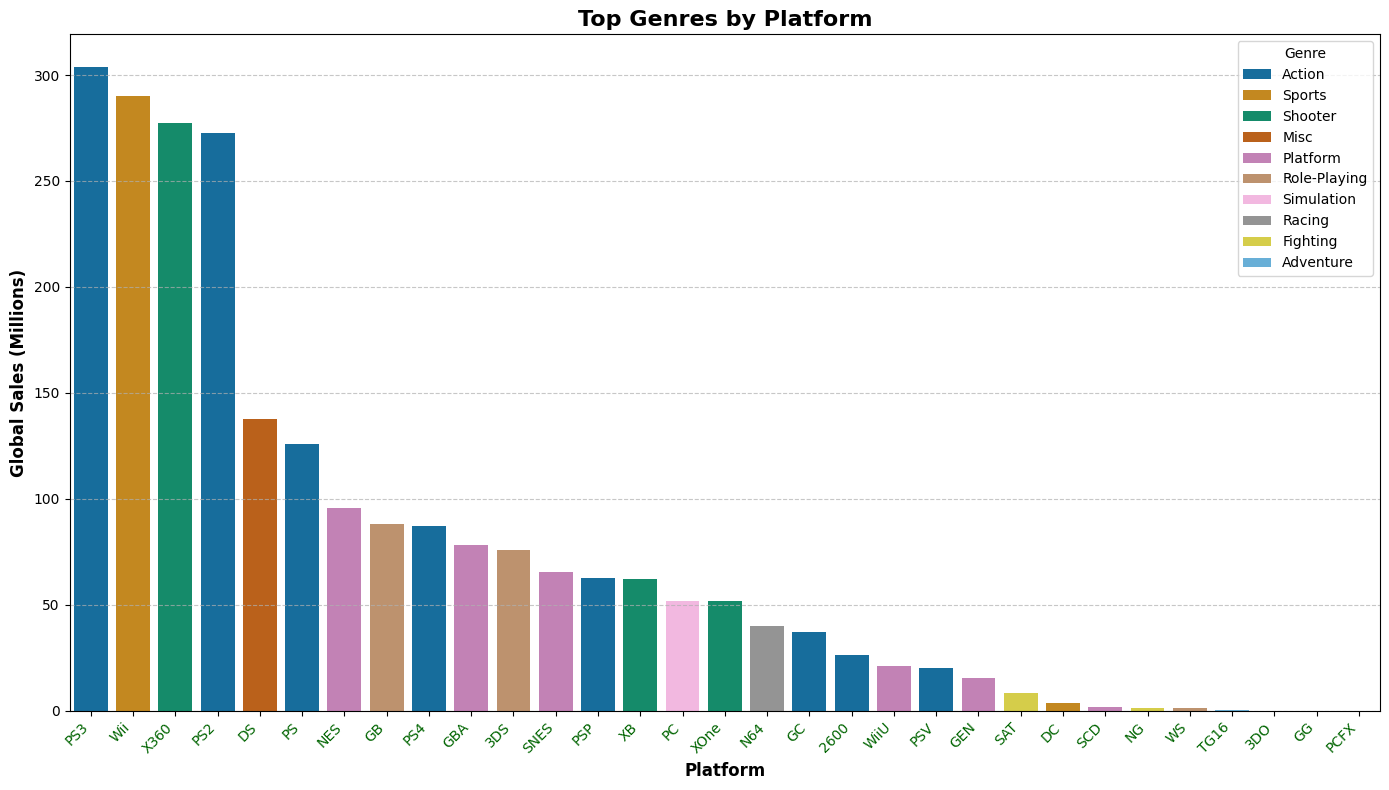

In [47]:
# Group by Platform and Genre, summing Global Sales
genrePlatformSales = df.groupby(['Platform', 'Genre'])['Global_Sales'].sum().reset_index()
# Sort by Global Sales and get the top genres for each platform
topGenrePlatformSales = genrePlatformSales.loc[genrePlatformSales.groupby('Platform')['Global_Sales'].idxmax()]
topGenrePlatformSales = topGenrePlatformSales.sort_values(by='Global_Sales', ascending=False)
# Create a Bar Chart for Top Genres by Platform
fig, ax = plt.subplots(figsize=(14, 8))  # Adjust figure size for better readability
sns.barplot(data=topGenrePlatformSales, x='Platform', y='Global_Sales', hue='Genre', ax=ax, palette='colorblind')
# Set labels and title
ax.set_xlabel('Platform', fontsize=12, fontweight='bold')
ax.set_ylabel('Global Sales (Millions)', fontsize=12, fontweight='bold')
ax.set_title('Top Genres by Platform', fontsize=16, fontweight='bold')
# Rotate x-tick labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=10, color='darkgreen')
# Add a horizontal grid for readability
ax.grid(axis='y', linestyle='--', alpha=0.7)
# Adjust layout to prevent labels from being cut off
plt.tight_layout()
plt.show()

### Genre Performance: Understanding Sales Distribution Beyond Platform Specifics
Having just pinpointed the top-selling genres for each individual platform, our client, the game development studio, now seeks a broader perspective on genre performance by examining the sales distribution of individual games across all genres. While understanding genre success on specific platforms is key, it's equally crucial to grasp the overall consistency and typical performance of games within that genre (regardless of platform). This insight is vital for their long-term strategic planning and risk assessment.

To achieve this, we will use box plots to visualize the global sales distribution for games within each genre. This will clearly illustrate:

* The **median sales** for games in every genre, indicating the typical commercial performance.
* The **interquartile range (IQR)**, showing the spread and consistency of sales within each genre category.

This analysis helps our client assess the inherent risk and reward profile associated with developing games in different categories, enabling more informed decisions about their core genre focus.

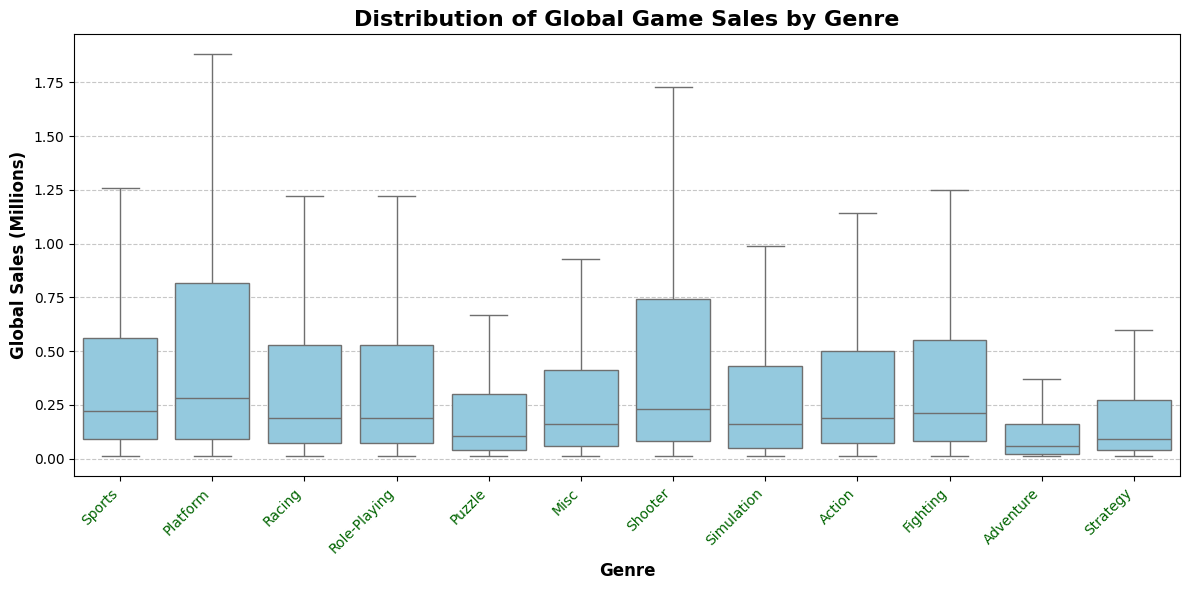

In [48]:
# Create a box plot to show the distribution of Global Sales by Genre
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Genre', y='Global_Sales', showfliers=False, color='skyblue')
plt.title('Distribution of Global Game Sales by Genre', fontsize=16, fontweight='bold')
plt.xlabel('Genre', fontsize=12, fontweight='bold')
plt.ylabel('Global Sales (Millions)', fontsize=12, fontweight='bold')
plt.xticks(rotation=45, ha='right', fontsize=10, color='darkgreen')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Top-Selling Titles by Genre & Platform: Pinpointing Success Drivers
Having identified overall genre trends and the most successful platforms, our client, the game development studio, now seeks a more granular understanding: which specific games have driven sales within successful genre-platform combinations?

This detailed analysis aims to:

Highlight winning formulas: Discover specific types of games (genre) that excel on particular systems (platform).
Inform focused development: Provide concrete examples of successful titles that align with both genre and platform strategies, helping the client target their efforts precisely.
We will delve into the top-performing genres and platforms to identify their highest-selling individual games, offering actionable insights into the precise characteristics of market success.

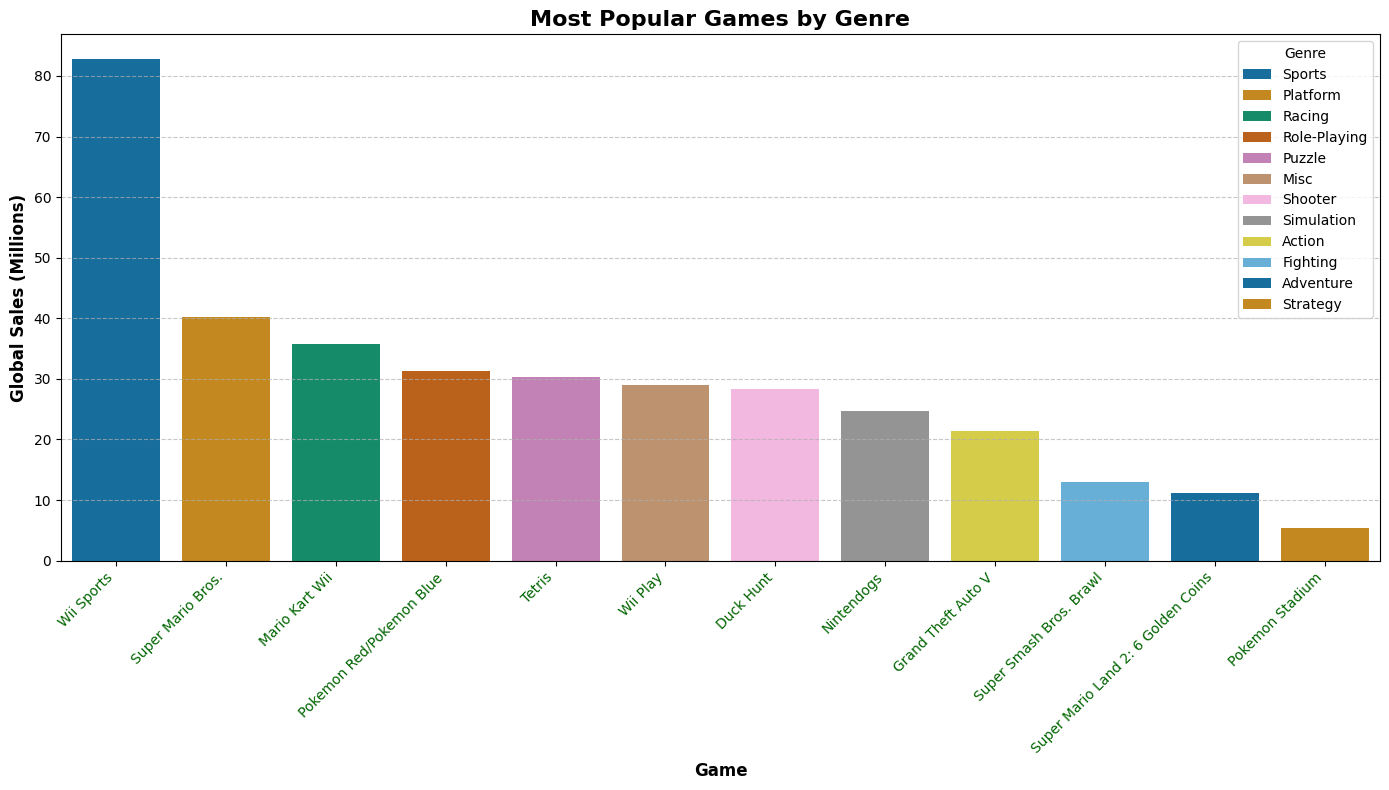

In [49]:
# Most popular games by genre
topGamesByGenre = df.loc[df.groupby('Genre')['Global_Sales'].idxmax()].sort_values(by='Global_Sales', ascending=False)
# Create a Bar Chart for Most Popular Games by Genre
fig, ax = plt.subplots(figsize=(14, 8))  # Adjust figure size for better readability
sns.barplot(data=topGamesByGenre, x='Name', y='Global_Sales', hue='Genre', ax=ax, palette='colorblind')
# Set labels and title
ax.set_xlabel('Game', fontsize=12, fontweight='bold')
ax.set_ylabel('Global Sales (Millions)', fontsize=12, fontweight='bold')
ax.set_title('Most Popular Games by Genre', fontsize=16, fontweight='bold')
# Rotate x-tick labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=10, color='darkgreen')
# Add a horizontal grid for readability
ax.grid(axis='y', linestyle='--', alpha=0.7)
# Adjust layout to prevent labels from being cut off
plt.tight_layout()
plt.show()

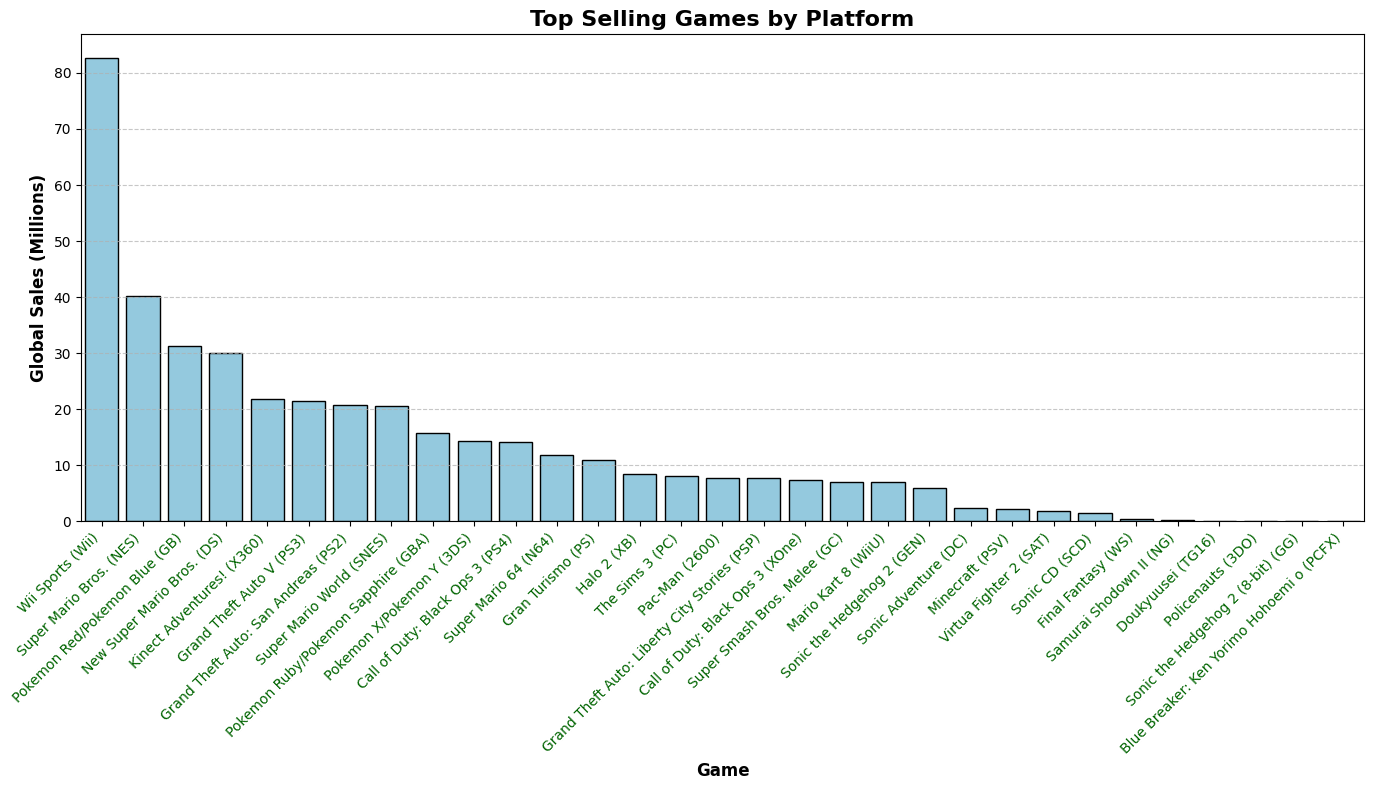

In [50]:
# Top selling games by platform
top_selling_games_by_platform = df.loc[df.groupby('Platform')['Global_Sales'].idxmax()].sort_values(by='Global_Sales', ascending=False)
# Create numerical positions for the x-axis ticks
x_positions = np.arange(len(top_selling_games_by_platform))
bottom_axis_labels = top_selling_games_by_platform.apply(
    lambda row: f"{row['Name']} ({row['Platform']})", axis=1
)
# Create a Bar Chart for Top Selling Games by Platform
fig, ax = plt.subplots(figsize=(14, 8))  # Adjust figure size for better readability
sns.barplot(data=top_selling_games_by_platform, x=bottom_axis_labels, y='Global_Sales', ax=ax, color='skyblue', edgecolor='black')
# Set labels and title
ax.set_xticks(x_positions)
ax.set_xticklabels(bottom_axis_labels, rotation=45, ha='right', fontsize=10, color='darkgreen')
ax.set_xlabel('Game', fontsize=12, fontweight='bold')
ax.set_ylabel('Global Sales (Millions)', fontsize=12, fontweight='bold')
ax.set_title('Top Selling Games by Platform', fontsize=16, fontweight='bold')
# Add a horizontal grid for readability
ax.grid(axis='y', linestyle='--', alpha=0.7)
# Adjust layout to prevent labels from being cut off
plt.tight_layout()
plt.show()

### Strategic Review: The Largest Publisher's Trajectory
Having thoroughly analyzed platform performance, genre trends, and the success drivers of individual top-selling games, our client, the game development studio, is now equipped with a comprehensive view of the market. With this richer context, they want to strategically review the performance of the largest publisher in the market.

This examination aims to:

Integrate insights: Understand how the largest publisher's long-term sales trajectory aligns with or deviates from the genre and platform trends we've observed.
Learn from longevity: Extract lessons from their sustained (or evolving) market dominance that could inform the new studio's long-term strategic planning and adaptation.
We will once again visualize the global sales trend of this industry giant over the years, interpreting their journey through the lens of our newly gained market knowledge.

In [88]:
# Find the largest Publisher by Global Sales
df.groupby('Publisher')['Global_Sales'].sum().reset_index().sort_values(by='Global_Sales', ascending=False).head(10)

,Publisher,Global_Sales
359,Nintendo,1784.43
138,Electronic Arts,1093.39
21,Activision,721.41
455,Sony Computer Entertainment,607.28
524,Ubisoft,473.54
493,Take-Two Interactive,399.30
487,THQ,340.44
275,Konami Digital Entertainment,278.56
445,Sega,270.70
347,Namco Bandai Games,253.65


In [92]:
# Create a copy of the DataFrame for analysis
dfAnalysis = df.copy()
dfAnalysis['Year'] = dfAnalysis['Year'].dt.year.astype(int)

# Step 1: Identify the overall top 10 publishers (across all years) using dfAnalysis
top10PublisherNames = dfAnalysis.groupby('Publisher')['Global_Sales'].sum().nlargest(10).index.tolist()

# Step 2: Calculate TOTAL market sales for each year from dfAnalysis
yearlyTotalMarketSales = dfAnalysis.groupby('Year')['Global_Sales'].sum().reset_index()
yearlyTotalMarketSales.rename(columns={'Global_Sales': 'Yearly_Total_Market_Sales'}, inplace=True)

# Step 3: Calculate Global_Sales for EACH publisher for EACH year (for ALL publishers in dfAnalysis)
publisherYearlySalesAll = dfAnalysis.groupby(['Year', 'Publisher'])['Global_Sales'].sum().reset_index()

# Step 4: Assign 'Other' to publishers not in the top 10 list
publisherYearlySalesAll['Grouped_Publisher'] = publisherYearlySalesAll['Publisher'].apply(
    lambda x: x if x in top10PublisherNames else 'Other'
)

# Step 5: Aggregate sales by 'Year' and 'Grouped_Publisher' (Top 10 + Other)
groupedPublisherYearlySales = publisherYearlySalesAll.groupby(
    ['Year', 'Grouped_Publisher']
)['Global_Sales'].sum().reset_index()


# Step 6: Create a complete grid of all years and all grouped publishers
allYears = sorted(dfAnalysis['Year'].unique()) # 'Year' here is already the integer year
allGroupedPublishersList = groupedPublisherYearlySales['Grouped_Publisher'].unique().tolist()

fullTimeSeriesSkeleton = pd.DataFrame(
    [(year, pub) for year in allYears for pub in allGroupedPublishersList],
    columns=['Year', 'Grouped_Publisher']
)

# Step 7: Merge aggregated sales onto the skeleton and fill NaNs
mergedSalesOntoSkeleton = fullTimeSeriesSkeleton.merge(
    groupedPublisherYearlySales,
    on=['Year', 'Grouped_Publisher'],
    how='left'
)
mergedSalesOntoSkeleton['Global_Sales'] = mergedSalesOntoSkeleton['Global_Sales'].fillna(0)

# Step 8: Merge with the total market sales
publisherMarketShare = mergedSalesOntoSkeleton.merge(
    yearlyTotalMarketSales, on='Year', how='left'
)

# Step 9: Calculate Market Share
publisherMarketShare['Market_Share'] = (
    publisherMarketShare['Global_Sales'] /
    publisherMarketShare['Yearly_Total_Market_Sales'].replace(0, pd.NA)
) * 100

# Step 10: Fill any remaining NaN Market_Share with 0.
publisherMarketShare['Market_Share'] = publisherMarketShare['Market_Share'].fillna(0)

# --- Create the Stacked Area Chart using Plotly Express ---
fig = px.area(publisherMarketShare,
              x='Year',
              y='Market_Share',
              color='Grouped_Publisher', # Use 'Grouped_Publisher' for color
              title='Publisher Market Share Over Time', # Updated title for clarity
              labels={'Market_Share': 'Market Share (%)', 'Year': 'Year', 'Grouped_Publisher': 'Publisher Group'}, # Updated labels
              hover_data={
                  'Global_Sales': True,  # Show publisher's sales for that year
                  'Market_Share': True,  # Show formatted market share percentage
                  'Yearly_Total_Market_Sales': True, # Show total market sales for the year
                  'Grouped_Publisher': False # This hides 'Grouped_Publisher' from the default hover box, as it's the color
              }
             )

# Update hovertemplate to customize what appears on hover
# We use customdata to pass specific columns to the hover template
fig.update_traces(
    hovertemplate="<br>".join([
        "Publisher: %{customdata[2]}", # This picks up the name from the 'color' mapping
        "Publisher Sales: %{customdata[0]:,.1f}M", # This maps to 'Global_Sales' from customdata
        "Market Share: %{y:.2f}%",
        "Total Market Sales: %{customdata[1]:,.1f}M", # This maps to 'Yearly_Total_Market_Sales' from customdata
        "<extra></extra>" # Removes the default trace name from hover
    ])
)

# Update layout for better interactivity and presentation
fig.update_layout(
    hovermode="x unified", # This makes hovering over a year show values for all publishers in that year
    yaxis_range=[0, 100], # Ensure Y-axis is from 0 to 100 for market share percentages
    xaxis_title='Year',
    yaxis_title='Market Share (%)',
    font=dict(size=12),
    title_font_size=18,
    legend_title_text='Game Publisher',
    height=700,
    width=1400,
    hoverlabel=dict(
        bgcolor="white",
        font_size=8,
        font_family="Arial"
    ),
    title_x=0.5,  # Center the title
)
fig.update_yaxes(rangemode="tozero") # Ensures y-axis starts at zero for proportions (even though range is set)
fig.show()

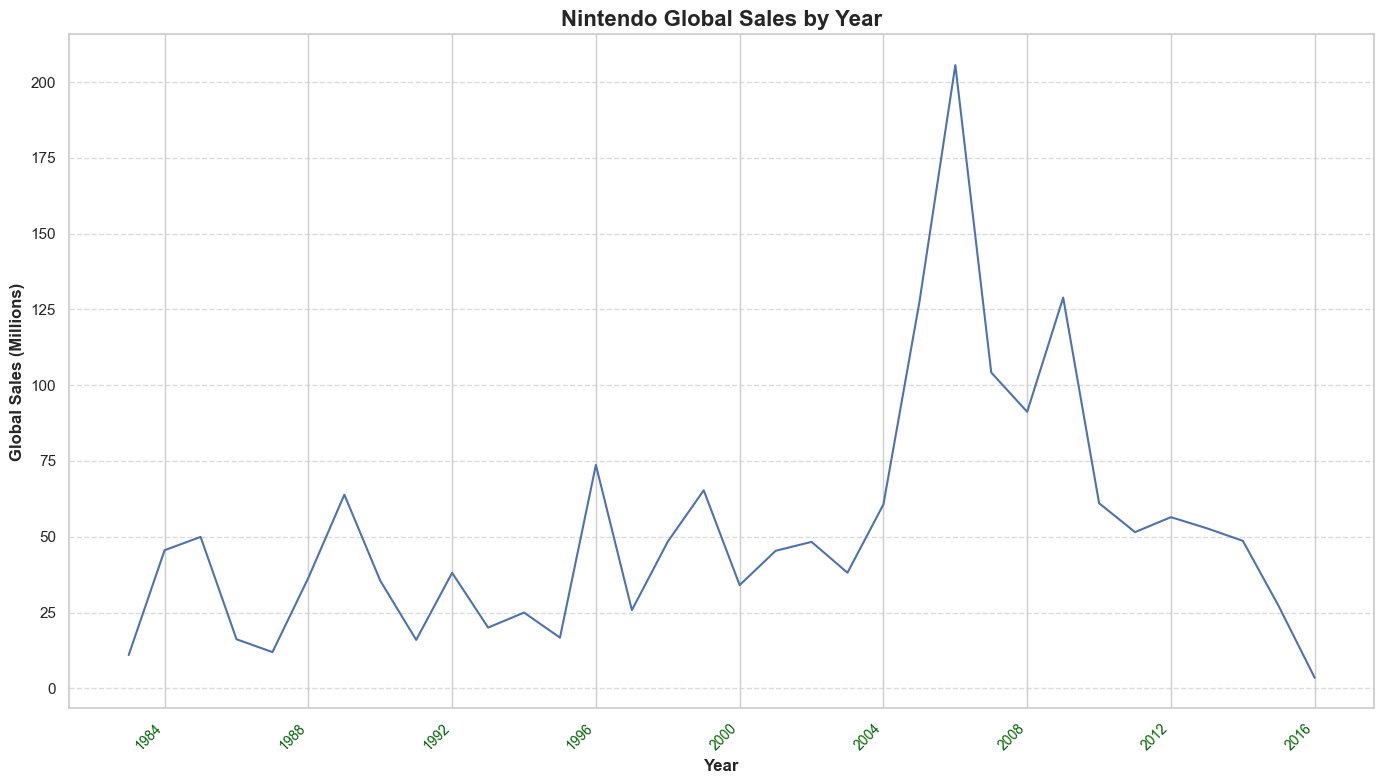

In [ ]:
# Filter the DataFrame for Nintendo
nintendo = df[df['Publisher'] == 'Nintendo']
# Create a line Chart for Nintendo's Global Sales by Year
fig, ax = plt.subplots(figsize=(14, 8))  # Adjust figure size for better readability
sns.lineplot(data=nintendo, x='Year', y='Global_Sales', estimator='sum', errorbar=None, ax=ax)
# Set labels and title
ax.set_xlabel('Year', fontsize=12, fontweight='bold')
ax.set_ylabel('Global Sales (Millions)', fontsize=12, fontweight='bold')
ax.set_title('Nintendo Global Sales by Year', fontsize=16, fontweight='bold')
# Rotate x-tick labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=10, color='darkgreen')
# Add a horizontal grid for readability
ax.grid(axis='y', linestyle='--', alpha=0.7)
# Adjust layout to prevent labels from being cut off
plt.tight_layout()
plt.show()

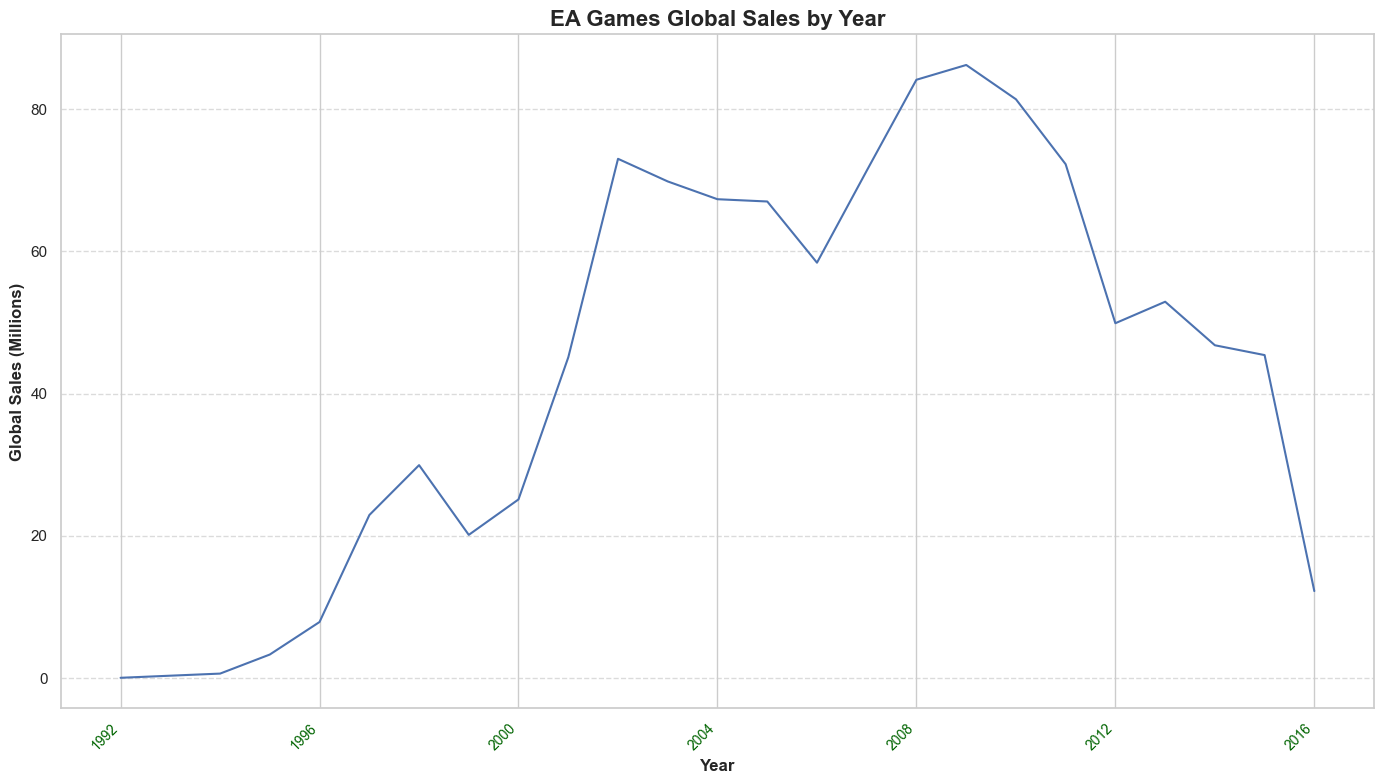

In [ ]:
# Filter the DataFrame for Electronic Arts (EA) Games
eaGames = df[(df['Publisher']=='Electronic Arts')]
# Create a line Chart for EA Games by Year
fig, ax = plt.subplots(figsize=(14, 8))  # Adjust figure size for better readability
sns.lineplot(data=eaGames, x='Year', y='Global_Sales', estimator='sum', errorbar=None, ax=ax)
# Set labels and title
ax.set_xlabel('Year', fontsize=12, fontweight='bold')
ax.set_ylabel('Global Sales (Millions)', fontsize=12, fontweight='bold')
ax.set_title('EA Games Global Sales by Year', fontsize=16, fontweight='bold')
# Rotate x-tick labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=10, color='darkgreen')
# Add a horizontal grid for readability
ax.grid(axis='y', linestyle='--', alpha=0.7)
# Adjust layout to prevent labels from being cut off
plt.tight_layout()
plt.show()

### Regional Market Analysis: Sales Distribution Across Key Territories
Understanding the global market requires a clear view of how sales are distributed across major regions. Our client, the game development studio, is now particularly interested in seeing the **sales distribution across North America (NA), Europe (EU), and Japan (JP)** to inform their global strategy.

<u>This analysis will help them:</u>

Identify primary markets: Determine which regions contribute most significantly to global sales.

Inform localization strategies: Understand the relative importance of each market when considering game releases and marketing efforts.

Allocate resources effectively: Guide decisions on where to focus investment for maximum regional impact.

#### Total Sales by Region (Map Chart)

First, we'll use a choropleth map to visually represent the total aggregated sales for each region on a geographical map. This direct visual comparison will help our client:

Identify primary markets at a glance by their overall sales magnitude.
Inform market entry strategies by clearly showing which territories are the largest contributors to global revenue.

In [ ]:
# Aggregate total sales for each region
total_na_sales = df['NA_Sales'].sum()
total_eu_sales = df['EU_Sales'].sum()
total_jp_sales = df['JP_Sales'].sum()
total_other_sales = df['Other_Sales'].sum() # Including 'Other' for completeness on a world map

# Adding percentage of total sales for each region
total_sales = total_na_sales + total_eu_sales + total_jp_sales + total_other_sales
na_sales_percentage = (total_na_sales / total_sales) * 100
eu_sales_percentage = (total_eu_sales / total_sales) * 100
jp_sales_percentage = (total_jp_sales / total_sales) * 100
other_sales_percentage = (total_other_sales / total_sales) * 100

# Adding the sales percentages to the DataFrame for display
mapData = pd.DataFrame({
    'Region': ['North America', 'Europe', 'Japan', 'Rest of World'],
    'Sales_Total': [total_na_sales, total_eu_sales, total_jp_sales, total_other_sales],
    'Sales_Percentage': [na_sales_percentage, eu_sales_percentage, jp_sales_percentage, other_sales_percentage],
    # Using ISO alpha-3 codes for countries Plotly recognizes
    'ISO_Alpha_3': ['USA', 'DEU', 'JPN', 'WLD'] # 'WLD' is a code for 'World'
})

# Filter out 'WLD' if it's too abstract or not needed for specific regional focus
# Or handle 'Other' sales differently if you want to show it on the remaining parts of the map
# For a clear map of NA, EU, JP:
map_data_filtered = mapData[mapData['Region'] != 'Rest of World']
mapData['Sales_Percentage'] = mapData['Sales_Percentage'].map('{:.2f}%'.format)

# 3. Create the choropleth map using Plotly Express
fig = px.choropleth(mapData,
                    locations="ISO_Alpha_3",
                    color="Sales_Total",
                    hover_name="Region",
                    # *** Key change here: Add 'Sales_Percentage' to hover_data with formatting ***
                    hover_data={
                        "Sales_Total": True, # Format as number with commas and 2 decimal places
                        "Sales_Percentage": True
                    },
                    color_continuous_scale=px.colors.sequential.Plasma,
                    title='Total Video Game Sales by Key Global Region',
                    scope='world'
                   )

fig.update_layout(
    # Set overall figure dimensions
    height=500, # You can experiment with different heights
    width=1000, # You can experiment with different widths

    # Reduce margins around the plot area
    # l=left, r=right, t=top, b=bottom (in pixels)
    margin=dict(l=20, r=0, t=40, b=0)) # Top margin adjusted for title

fig.show()

#### Sales Distribution within Regions (Box Plot)
Following our overview of total regional sales, we'll use box plots to illustrate the distribution of individual game sales within each region. This will allow us to see beyond just aggregate sums, revealing the typical sales performance (median and interquartile range) of games in NA, EU, and JP.

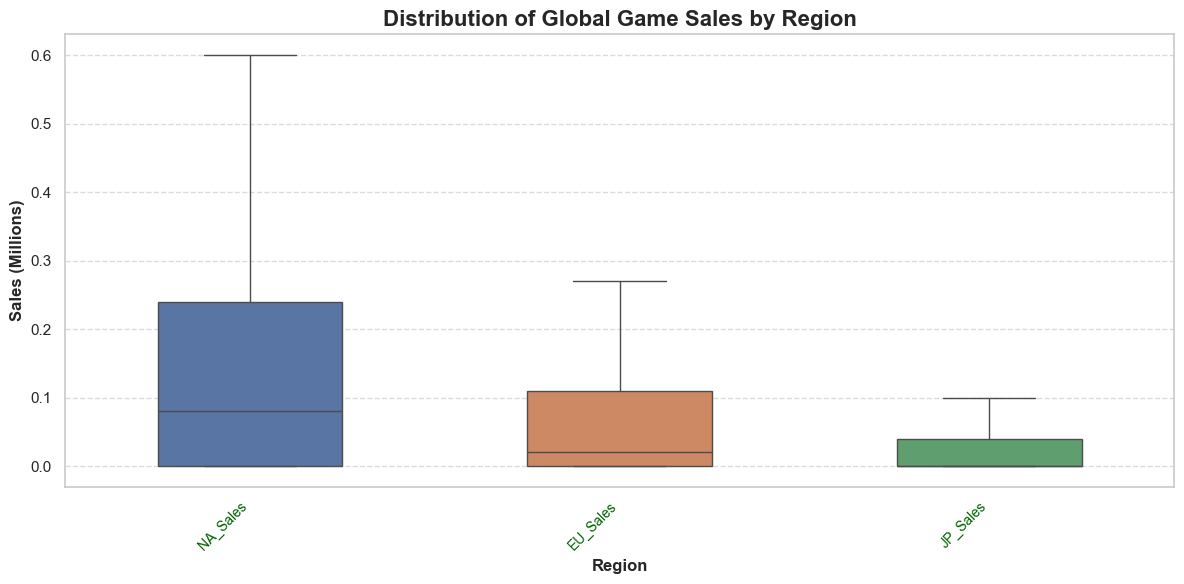

In [ ]:
# Create a box plot to show the distribution of Global Sales for NA, EU, and JP regions
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['NA_Sales', 'EU_Sales', 'JP_Sales']], showfliers=False, width=0.5)
plt.title('Distribution of Global Game Sales by Region', fontsize=16, fontweight='bold')
plt.xlabel('Region', fontsize=12, fontweight='bold')
plt.ylabel('Sales (Millions)', fontsize=12, fontweight='bold')
plt.xticks(rotation=45, ha='right', fontsize=10, color='darkgreen')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Regional Sales Correlation: Understanding Inter-Market Relationships
Our client, the game development studio, is now curious about the interplay between different regional markets. Specifically, they want to understand if there are any correlations between sales in North America (NA), Europe (EU), and Japan (JP). Discovering strong correlations can suggest similar market behaviors or interconnected sales drivers across these territories.

#### Visualizing Correlations with a Heatmap
First, we will use a heatmap to visualize the correlation matrix between the sales in all major regions (NA, EU, and JP). This will provide a quick and intuitive overview of the strength and direction of linear relationships between sales in these different markets.

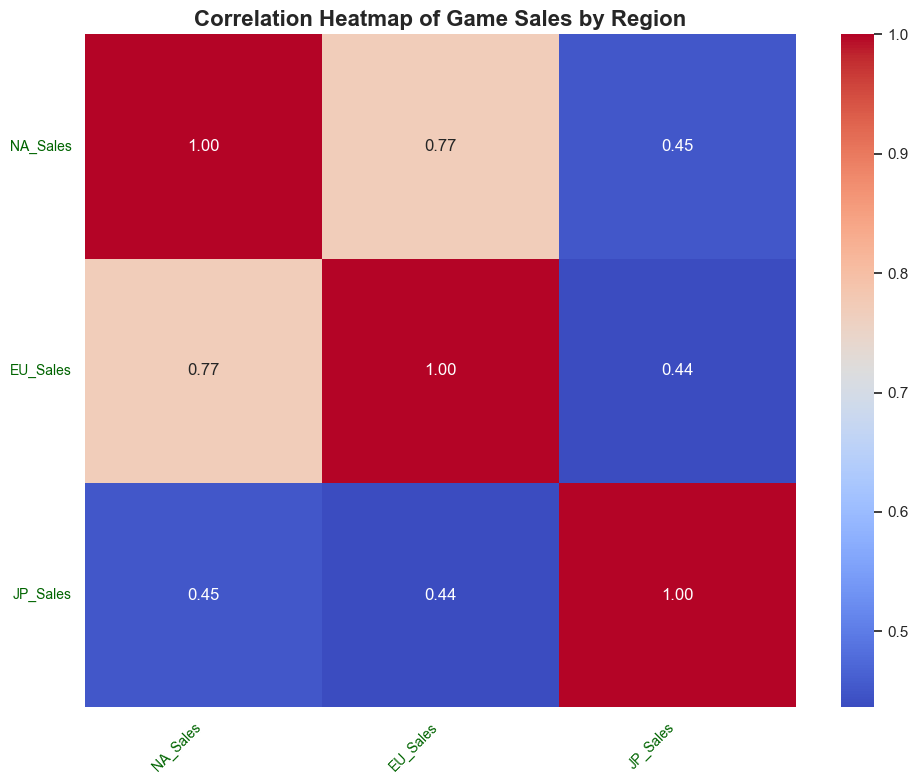

In [ ]:
# Create a heatmap to visualize the correlation between different sales regions
plt.figure(figsize=(10, 8))
sns.heatmap(df[['NA_Sales', 'EU_Sales', 'JP_Sales']].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Game Sales by Region', fontsize=16, fontweight='bold')
plt.xticks(rotation=45, ha='right', fontsize=10, color='darkgreen')
plt.yticks(rotation=0, fontsize=10, color='darkgreen')
plt.tight_layout()
plt.show()

###  Deep Dive into High Correlation: NA vs. EU Sales (Scatter Plot)
Upon examining the correlation matrix, we observe a notably high positive correlation between sales in North America (NA) and Europe (EU), with a correlation coefficient of approximately 0.77. This strong relationship suggests that games performing well in NA tend to perform similarly well in EU, and vice-versa.

To further investigate and visualize this linear relationship, we will create a scatterplot specifically depicting the relationship between NA Sales and EU Sales. This plot will help our client understand the consistency of game performance across these two major Western markets, which is crucial for synchronized release strategies and marketing campaigns.

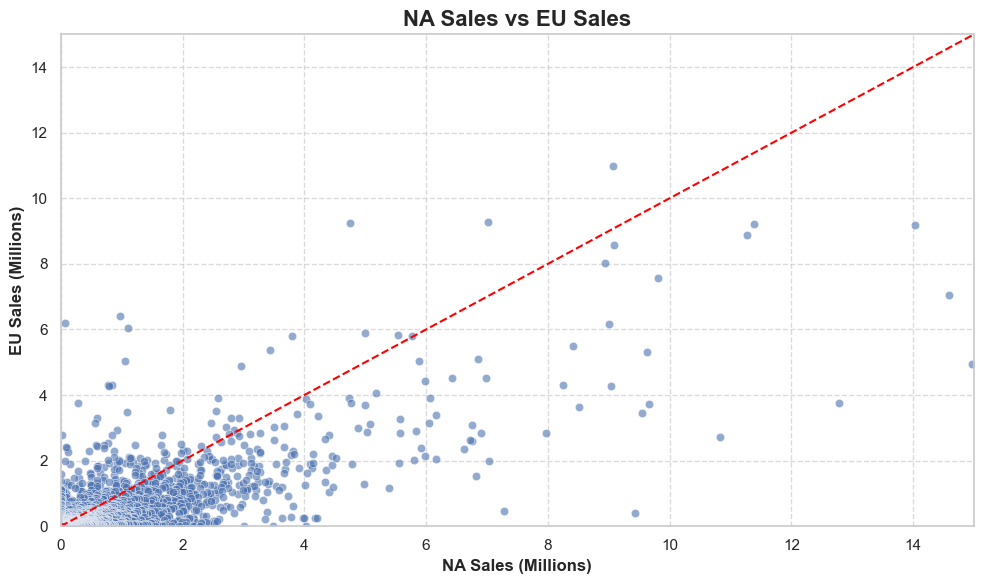

In [ ]:
# Create a scatter plot to show the high correlation between NA and EU sales
fig, ax = plt.subplots(figsize=(10, 6))
sns.scatterplot(data=df, x='NA_Sales', y='EU_Sales', alpha=0.6)
plt.axline((0, 0), slope=1, color='red', linestyle='--', label='y=x Line')  # Add a reference line
plt.title('NA Sales vs EU Sales', fontsize=16, fontweight='bold')
plt.xlabel('NA Sales (Millions)', fontsize=12, fontweight='bold')
plt.ylabel('EU Sales (Millions)', fontsize=12, fontweight='bold')
plt.xlim(0, 15)  # Adjust x-axis limit for better visibility
plt.ylim(0, 15)  # Adjust y-axis limit for better visibility
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Conclusion & Strategic Recommendations for Our Client
Through this exploratory data analysis, we've provided our client, the new game development studio, with a deeper understanding of the complex video game market. By framing our analysis around their key questions, we've uncovered valuable insights that can directly inform their strategic decisions:

Key Insights Gained:
* **Market Leadership & Longevity:** We identified **Nintendo & Electronic Arts (EA) Games** as the clear market leaders, demonstrating its ability to maintain significant global sales over many years. Its historical performance serves as a benchmark for sustained success.
* **Platform Dominance:** Our analysis highlighted the platforms that consistently drive the highest total sales, along with the varying distribution of individual game sales on each. This provides a clearer picture of market concentration and typical game performance per system.
* **Evolving Genre Landscape:** We observed the sales trends of various genres over time, pinpointing both evergreen categories and those experiencing significant growth or decline. This insight is crucial for aligning game development with current and future player preferences.
* **Genre-Specific Performance Metrics:** Beyond overall trends, our analysis of global sales distribution by genre provided a nuanced view of typical sales (median) and consistency (IQR) within each genre, crucial for understanding inherent risk and reward.
* **Optimized Genre-Platform Pairings:** We identified the top-selling genres for each specific platform, providing highly actionable insights into which game types are most commercially viable on particular systems.
* **Winning Game Formats:** By examining top-selling titles within specific genre-platform combinations, we gained concrete examples of successful game characteristics and market fit, offering valuable lessons for potential new releases.
* **Regional Market Dynamics:** We visualized the overall contribution of North America, Europe, and Japan to global sales, identifying NA as the largest market. Furthermore, we discovered a **strong positive correlation (0.77)** between North American and European sales, suggesting interconnected market behaviors and potentially synchronized release strategies across these two major Western territories.

#### Strategic Recommendations for the Game Development Studio:
Based on these findings, we recommend the following strategic considerations for our client:

1. **Target Dominant Platforms & Genres:** Focus development efforts on games that fit within the most commercially successful platforms (PS2, NES, & GB) and genres identified (Action, Sports, Role-Playing, Platform).
2. **Understand Genre Risk Profiles:** Utilize the sales distribution insights to assess the risk and reward of a chosen genre. Be prepared for the 'hit-driven' nature of some genres versus the more consistent performance of others.
3. **Learn from Market Leaders:** Study the successful titles and publishing strategies of Nintendo or EA Games to understand factors contributing to long-term market presence and sales consistency.
4. **Leverage Regional Correlations:** Given the strong correlation between NA and EU sales, consider synchronized marketing campaigns and release schedules for these two regions. Success in one often signals potential for the other.
5. **Focus on Key Markets:** Prioritize market entry and localization efforts for regions that demonstrate the highest overall sales potential and appropriate sales distributions.
6. **Consider Niche Markets:** While focusing on top trends, also consider the sales distribution within regions to identify potentially underserved or consistently performing niches that might offer less competition.

#### Future Work:
To further enhance these insights, future analysis could include:

* **Competitor Benchmarking:** A deeper dive into how other major publishers compare in terms of genre focus, platform distribution, and regional strengths.
* **Trend Prediction:** Utilizing time-series forecasting models to predict future sales trends for specific genres or platforms.
* **Audience Demographics:** If data becomes available, integrate demographic information to understand player preferences in more detail.

This analysis provides a solid foundation for the new game development studio to confidently navigate the competitive video game market.